# Tutorial 4:

## Decision Tree Regression

Decision Tree Regression is a machine learning model that uses a decision tree for predictive analysis. Decision Tree builds regression models in the form of a tree structure. Decision trees are one of the simplest and most common ways of modelling outcomes based on decisions.

In machine learning, Decision Trees start by identifying the best feature for splitting the dataset which then finds the subsets that has the best possible value for the best feature. The dataset is split based on decisions until a level of optimization is reached.

![Decision Tree](images/Decision_Tree.png "Decision Tree")

  
#### For a deeper understanding of Decision Tree Regression, use the following resources:
- [Decision Tree Learning](http://www.cs.princeton.edu/courses/archive/spr07/cos424/papers/mitchell-dectrees.pdf)
- [Machine Learning: Decision Trees](http://pages.cs.wisc.edu/~jerryzhu/cs540/handouts/dt.pdf)



## In this practice session, we will learn to code Decision Tree Regression. 
### We will perform the following steps to build a simple classifier using the popular Beer dataset.

 
 
  - **Data Preprocessing**

    - Importing the libraries.
    - Importing dataset.
    - Dealing with the categorical variable.
    - Classifying dependent and independent variables.
    - Splitting the data into a training set and test set.
    - Feature scaling.
 

  -  **Decision Tree Regression**

    - Create a Decision Tree Regression.
    - Feed the training data to the regression.
    - Predicting the score for the test set.
    - Using the rmse to calculate the performance.

In [38]:
#1 Importing essential libraries
import ipywidgets as widgets
from IPython.display import display
style = {'description_width': 'initial'}
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [39]:
#2 Importing the dataset

file_name = 'DataSets/beer_data.csv'
dataset = pd.read_csv(file_name)

In [40]:
#Displaying the dataset
dataset.head(8)

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5
5,58046,mikedrinksbeer2,4.5
6,58046,dbmernin83,4.0
7,58046,Blakaeris,4.5


In [41]:
# Dealing with Categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#Making sure the type of the review_profilename column is str
dataset["review_profilename"] = dataset["review_profilename"].astype(str)
dataset["review_profilename"] = le.fit_transform(dataset["review_profilename"])
dataset.head()

,beer_beerid,review_profilename,review_overall
0,48215,20635,3.0
1,52159,18354,3.0
2,52159,9525,3.0
3,52159,19171,4.0
4,52159,6912,3.5


In [42]:
print(f"Dataset has {dataset.shape[0]} rows and {dataset.shape[1]} columns.")

Dataset has 475984 rows and 3 columns.


In [43]:
dataset.columns.tolist()

['beer_beerid', 'review_profilename', 'review_overall']

In [44]:
#3 classify dependent and independent variables
X = dataset[[col for col in dataset.columns if col not in ('review_overall')]].values  #independent variables 
y = dataset['review_overall'].values  #dependent variable 

In [45]:
print("\nIdependent Variables :\n\n", X[:5])
print("\nDependent Variable (Score):\n\n", y[:5])


Idependent Variables :

 [[48215 20635]
 [52159 18354]
 [52159  9525]
 [52159 19171]
 [52159  6912]]

Dependent Variable (Score):

 [3.  3.  3.  4.  3.5]


## Create Train and Test Sets

In [46]:
#4 Creating training set and testing set
from sklearn.model_selection import train_test_split
test_size = widgets.FloatSlider(min=0.01, max=0.6, value=0.2, description="Test Size :", tooltips=['Usually 20-30%'])
display(test_size)

FloatSlider(value=0.2, description='Test Size :', max=0.6, min=0.01)

In [47]:
#Divide the dataset into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=test_size.value, random_state = 0) 

In [48]:
print("Training Set :\n----------------\n")
print("X = \n", X_train[:5])
print("y = \n", y_train[:5])

print("\n\nTest Set :\n----------------\n")
print("X = \n",X_test[:5])
print("y = \n", y_test[:5])

Training Set :
----------------

X = 
 [[ 2512  8970]
 [60420 13289]
 [ 1443 19400]
 [  836  5998]
 [12104 15292]]
y = 
 [4.5 3.5 4.5 4.  4. ]


Test Set :
----------------

X = 
 [[ 9873  7180]
 [42466 16724]
 [ 1119  4712]
 [38919 10641]
 [34832 17880]]
y = 
 [3.  3.5 2.5 2.5 5. ]


In [49]:
print(f"Shape of Training set is {X_train.shape}")
print(f"Shape of Testing set is {X_test.shape}")

Shape of Training set is (380787, 2)
Shape of Testing set is (95197, 2)


### Apply Decision Tree Regression 

In [50]:
# import decision tree library
from sklearn.tree import DecisionTreeRegressor

# configure params for the model.
max_feat_wig = widgets.ToggleButtons(options=['log2', 'sqrt', 'auto'],
                                    description='Number of features for the best split :',
                                    disabled=False,
                                    style=style)

display(max_feat_wig)

max_depth_wig = widgets.Dropdown(options=[10, 20, 30, 50],
                            description='The maximum depth of the Tree. :',
                            style=style)

display(max_depth_wig)

min_split_wig = widgets.Dropdown(options=[100, 200, 300, 500],
                            description='The maximum depth of the Tree. :',
                            style=style)

display(min_split_wig)

ToggleButtons(description='Number of features for the best split :', options=('log2', 'sqrt', 'auto'), style=T…

Dropdown(description='The maximum depth of the Tree. :', options=(10, 20, 30, 50), style=DescriptionStyle(desc…

Dropdown(description='The maximum depth of the Tree. :', options=(100, 200, 300, 500), style=DescriptionStyle(…

### Predict and Evaluate the Model 

In [51]:
# Train the Regressor with training set
regressor = DecisionTreeRegressor(max_features=max_feat_wig.value,
                                  max_depth=max_depth_wig.value,
                                  min_samples_split=min_split_wig.value)

#fit the linear model
regressor.fit(X_train, y_train)

#7 predict the outcome of test sets
y_Pred = regressor.predict(X_test)
print("\nPredictions = ", y_Pred)


Predictions =  [3.80958537 3.82897157 4.04128035 ... 4.         3.82897157 3.74801902]


In [52]:
# Calculating score from Root Mean Log Squared Error
def rmlse(y_test, y_pred):
    error = np.square(np.log10(y_pred +1) - np.log10(y_test +1)).mean() ** 0.5
    score = 1 - error
    return score

# Printing the score
print("\n----------------------------\nRMLSE Score = ", rmlse(y_test, y_Pred))

#9 Comparing Actual and Predicted Salaries for he test set
print("\nActual vs Predicted Scores \n------------------------------\n")
error_df = pd.DataFrame({"Actual" : y_test,
                         "Predicted" : y_Pred,
                         "Abs. Error" : np.abs(y_test - y_Pred)})

error_df


----------------------------
RMLSE Score =  0.926600501999191

Actual vs Predicted Scores 
------------------------------



,Actual,Predicted,Abs. Error
0,3.0,3.809585,0.809585
1,3.5,3.828972,0.328972
2,2.5,4.041280,1.541280
3,2.5,3.809585,1.309585
4,5.0,3.828972,1.171028
...,...,...,...
95192,3.0,3.756011,0.756011
95193,3.5,3.756011,0.256011
95194,4.0,4.000000,0.000000
95195,5.0,3.828972,1.171028


In [53]:
#9 Calculating score from Root Mean Log Squared Error
from sklearn.metrics import r2_score
def rmlse(y_test, y_pred):
    error = np.square(np.log10(y_pred +1) - np.log10(y_test +1)).mean() ** 0.5
    score = 1-error
    return error, score

error, score = rmlse(y_test, y_Pred)

print("\n",'-'*40)
print("RMLSE : ", error)
print("Score :", score)


 ----------------------------------------
RMLSE :  0.07339949800080899
Score : 0.926600501999191


### Actual vs. Predicted 

No handles with labels found to put in legend.


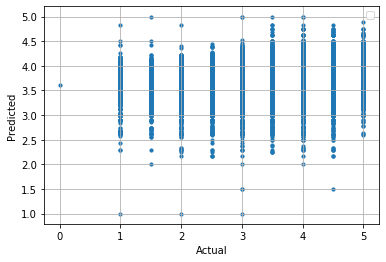

In [31]:
#Plotting Actual observation vs Predictions
plt.scatter(y_test, y_Pred, s = 10)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend();
plt.grid();
plt.show();